Email spam detection with machine learning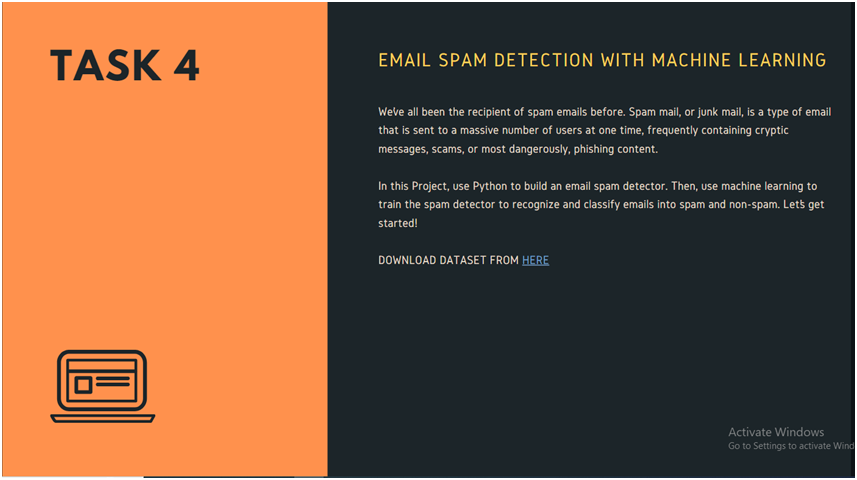


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#reading csv file
data = pd.read_csv("/content/archive (4).zip", encoding = "latin")

In [3]:
#dataset imported
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
#checking for null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#dropping the columns having null values
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)

In [7]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data['v1'] = le.fit_transform(data['v1'])

In [10]:
# dividing data into x and y
x = data.v2
y = data.v1

In [11]:
#training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 23)

In [12]:
x_test.shape

(1115,)

In [13]:
#converting text into numerical values
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english', lowercase = True)
vect



TfidfVectorizer(stop_words='english')

In [14]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [15]:
x_train_vec = vect.fit_transform(x_train)
x_test_vec = vect.transform(x_test)

In [16]:
print(x_train_vec)
print(x_test_vec)

  (0, 6463)	0.3094874467071012
  (0, 548)	0.3094874467071012
  (0, 1562)	0.3094874467071012
  (0, 10)	0.3094874467071012
  (0, 4075)	0.2649702017540671
  (0, 1795)	0.17624788296020283
  (0, 446)	0.2602251303687553
  (0, 7361)	0.23343966112281994
  (0, 3378)	0.20580373505253705
  (0, 3420)	0.3094874467071012
  (0, 1493)	0.3094874467071012
  (0, 370)	0.23788736466618637
  (0, 6278)	0.22766451037531116
  (0, 5841)	0.22593073970659636
  (1, 3994)	0.5027682527933429
  (1, 1079)	0.8644212422095661
  (2, 5948)	0.66758562585664
  (2, 7236)	0.5783127423938289
  (2, 6150)	0.4689176944139847
  (3, 970)	0.4791476840738884
  (3, 3426)	0.4870274137228924
  (3, 5370)	0.4829838203157923
  (3, 1076)	0.547675473654045
  (4, 7348)	0.27551736514025954
  (4, 6990)	0.4222468910788417
  :	:
  (4451, 3845)	0.09785171639226076
  (4451, 3153)	0.11882292736769784
  (4451, 7157)	0.10402779539747516
  (4451, 5855)	0.10327378481172605
  (4452, 2308)	0.6288104967970073
  (4452, 5034)	0.5995359888448668
  (4452, 5032

In [17]:
#applying model
from sklearn.svm import SVC
model = SVC()

In [18]:
# fitting the data
model.fit(x_train_vec,y_train)

SVC()

In [19]:
# predicting the output
pred = model.predict(x_train_vec)
pred2 = model.predict(x_test_vec)

In [20]:
# accuracy of model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, pred)) # on training data
print("Accuracy score:",accuracy_score(y_test,pred2)) #on testing data

0.9986538030065066
Accuracy score: 0.9775784753363229
